In [1]:
from glob import glob as glob
from itertools import product

import torch as tr
import numpy as np

from PM_models import *
from PM_tasks import *

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [94]:
trep = 9
seqlen = 5
ntrials = 4
embool = 1

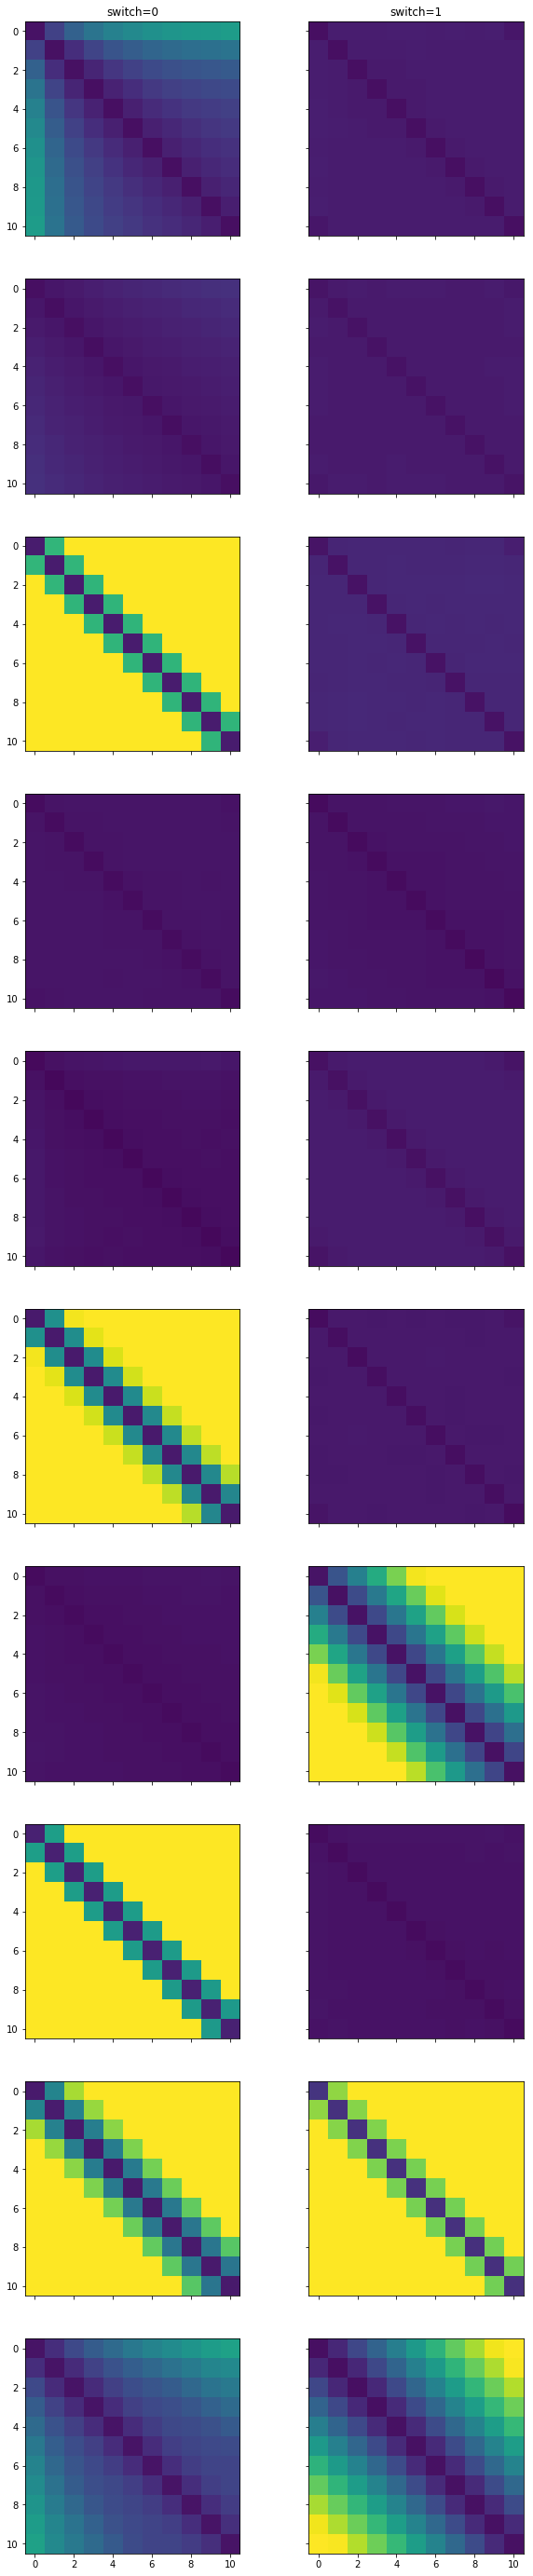

In [95]:


fig,axarr = plt.subplots(10,2,figsize=(10,50),sharex=True,sharey=True)

for switch in [0,1]:
  fpath = 'switch_%i-trep_%i-tr_seqlen_%i-tr_ntrials_%i-ev_EM_%i-testphase_means.npy'%(
            switch,trep,seqlen,ntrials,embool)
  rdms = np.load('model_data/buckets_eval_data/testphase_rdms/'+fpath)
  axarr[0,switch].set_title('switch=%i'%switch)
  for sub in range(10):
    ax = axarr[sub,switch]
    ax.imshow(rdms[sub],vmin=0,vmax=50)
    


In [96]:


rdms = -np.ones([2,10,11,11]) # switch,subs,trial,trial

for switch in [0,1]:
  fpath = 'switch_%i-trep_%i-tr_seqlen_%i-tr_ntrials_%i-ev_EM_%i-testphase_means.npy'%(
            switch,trep,seqlen,ntrials,embool)
  rdms[switch,:,:,:] = np.load('model_data/buckets_eval_data/testphase_rdms/'+fpath)


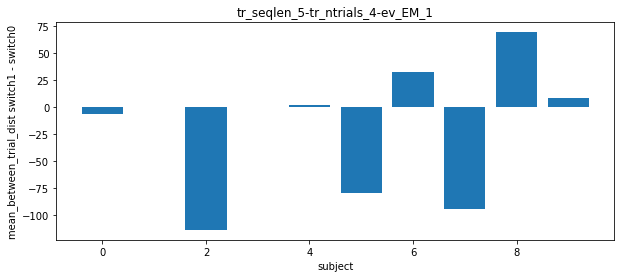

In [98]:
""" Hypothesis
between trial distance will be greater in switch=1 condition
"""

mean_between_trial_dist = rdms.mean((2,3))
dist_diff = mean_between_trial_dist[1] - mean_between_trial_dist[0] 

plt.figure(figsize=(10,4))
ax = plt.gca()
ax.bar(range(10),dist_diff)
ax.set_xlabel('subject')
ax.set_ylabel('mean_between_trial_dist switch1 - switch0')
title = 'tr_seqlen_%i-tr_ntrials_%i-ev_EM_%i'%(
            seqlen,ntrials,embool)
ax.set_title(title)
plt.savefig('figures/buckets/mean_distance_difference-subj-%s'%title)

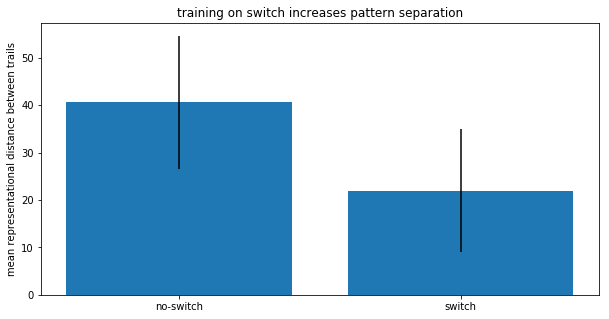

In [99]:
M = mean_between_trial_dist.mean(1)
S = mean_between_trial_dist.std(1)/np.sqrt(10)
plt.figure(figsize=(10,5))
plt.bar(['no-switch','switch'],M,yerr=S)
plt.ylabel('mean representational distance between trails')
plt.title('training on switch increases pattern separation')
plt.savefig('figures/buckets/mean_distance_difference-group-%s'%title)
